In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'1.2.4'

In [3]:
np.__version__

'1.19.5'

# Transformação dos Dados

In [4]:
#importando dados do sudeste
data_doc = pd.read_csv("DADOS/docentes_sudeste.csv", sep="|", nrows=500000)

In [5]:
#a primeira linha abaixo faz com que todas as colunas sejam mostradas, e a segunda apresenta as primeiras 5 linhas

pd.set_option("display.max_columns", None)
data_doc = data_doc
data_doc.head(5)

,NU_ANO_CENSO,ID_DOCENTE,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_LOCAL_RESID_DIFERENCIADA,IN_NECESSIDADE_ESPECIAL,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_DEF_AUDITIVA,IN_DEF_FISICA,IN_DEF_INTELECTUAL,IN_SURDEZ,IN_SURDOCEGUEIRA,IN_DEF_MULTIPLA,IN_AUTISMO,IN_SUPERDOTACAO,TP_ESCOLARIDADE,TP_ENSINO_MEDIO,TP_SITUACAO_CURSO_1,CO_AREA_CURSO_1,CO_CURSO_1,IN_LICENCIATURA_1,NU_ANO_CONCLUSAO_1,TP_TIPO_IES_1,CO_IES_1,TP_SITUACAO_CURSO_2,CO_AREA_CURSO_2,CO_CURSO_2,IN_LICENCIATURA_2,NU_ANO_CONCLUSAO_2,TP_TIPO_IES_2,CO_IES_2,TP_SITUACAO_CURSO_3,CO_AREA_CURSO_3,CO_CURSO_3,IN_LICENCIATURA_3,NU_ANO_CONCLUSAO_3,TP_TIPO_IES_3,CO_IES_3,IN_COMPLEMENTACAO_PEDAGOGICA,CO_AREA_COMPL_PEDAGOGICA_1,CO_AREA_COMPL_PEDAGOGICA_2,CO_AREA_COMPL_PEDAGOGICA_3,IN_ESPECIALIZACAO,IN_MESTRADO,IN_DOUTORADO,IN_POS_NENHUM,IN_ESPECIFICO_CRECHE,IN_ESPECIFICO_PRE_ESCOLA,IN_ESPECIFICO_ANOS_INICIAIS,IN_ESPECIFICO_ANOS_FINAIS,IN_ESPECIFICO_ENS_MEDIO,IN_ESPECIFICO_EJA,IN_ESPECIFICO_ED_ESPECIAL,IN_ESPECIFICO_ED_INDIGENA,IN_ESPECIFICO_CAMPO,IN_ESPECIFICO_AMBIENTAL,IN_ESPECIFICO_DIR_HUMANOS,IN_ESPECIFICO_DIV_SEXUAL,IN_ESPECIFICO_DIR_ADOLESC,IN_ESPECIFICO_AFRO,IN_ESPECIFICO_GESTAO,IN_ESPECIFICO_OUTROS,IN_ESPECIFICO_NENHUM,ID_TURMA,TP_TIPO_DOCENTE,TP_TIPO_CONTRATACAO,IN_DISC_LINGUA_PORTUGUESA,IN_DISC_EDUCACAO_FISICA,IN_DISC_ARTES,IN_DISC_LINGUA_INGLES,IN_DISC_LINGUA_ESPANHOL,IN_DISC_LINGUA_FRANCES,IN_DISC_LINGUA_OUTRA,IN_DISC_LIBRAS,IN_DISC_LINGUA_INDIGENA,IN_DISC_PORT_SEGUNDA_LINGUA,IN_DISC_MATEMATICA,IN_DISC_CIENCIAS,IN_DISC_FISICA,IN_DISC_QUIMICA,IN_DISC_BIOLOGIA,IN_DISC_HISTORIA,IN_DISC_GEOGRAFIA,IN_DISC_SOCIOLOGIA,IN_DISC_FILOSOFIA,IN_DISC_ESTUDOS_SOCIAIS,IN_DISC_EST_SOCIAIS_SOCIOLOGIA,IN_DISC_INFORMATICA_COMPUTACAO,IN_DISC_ENSINO_RELIGIOSO,IN_DISC_PROFISSIONALIZANTE,IN_DISC_ESTAGIO_SUPERVISIONADO,IN_DISC_PEDAGOGICAS,IN_DISC_OUTRAS,TP_TIPO_ATENDIMENTO_TURMA,TP_TIPO_LOCAL_TURMA,TP_MEDIACAO_DIDATICO_PEDAGO,TP_ETAPA_ENSINO,CO_CURSO_EDUC_PROFISSIONAL,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
0,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282104,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,25.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282105,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1,0.0,1,26.0,NaN,0.0,1.0,0.0,0.0,35127231,3,3515,35061,35,3550308,355030891,4,1,4.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,2020,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,33,1,1,1,76,35.0,3550308.0,NaN,NaN,1.0,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1.0,0.0,0114M011,1,2015.0,2.0,316.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21282106,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,N

In [6]:
#Escolhendo os dados que serão utilizados nos testes gerais

dados_1 = data_doc[['ID_DOCENTE','NU_MES','NU_ANO','NU_IDADE_REFERENCIA','TP_SEXO','TP_COR_RACA','IN_NECESSIDADE_ESPECIAL','IN_LICENCIATURA_1','IN_ESPECIALIZACAO','IN_MESTRADO','IN_DOUTORADO','IN_POS_NENHUM', 'IN_DISC_LINGUA_PORTUGUESA', 'IN_DISC_EDUCACAO_FISICA', 'IN_DISC_ARTES', 'IN_DISC_LINGUA_INGLES', 'IN_DISC_MATEMATICA', 'IN_DISC_CIENCIAS', 'IN_DISC_FISICA', 'IN_DISC_QUIMICA', 'IN_DISC_BIOLOGIA', 'IN_DISC_HISTORIA', 'IN_DISC_GEOGRAFIA', 'IN_DISC_SOCIOLOGIA', 'IN_DISC_FILOSOFIA']]

In [7]:
#Renomeando as colunas
dados_1 = dados_1.rename(columns={"NU_MES":"Mês Nasc.", "NU_ANO": "Ano Nasc.", "NU_IDADE_REFERENCIA":"Idade", "TP_SEXO":"Sexo", "TP_COR_RACA":"Etnia", "IN_NECESSIDADE_ESPECIAL": "Nec. Especial", "IN_LICENCIATURA_1":"Licenciatura", "IN_ESPECIALIZACAO":"Com espec.", "IN_MESTRADO":"Com mestrado", "IN_DOUTORADO":"Com doutorado", "IN_POS_NENHUM":"Sem pós", "IN_DISC_LINGUA_PORTUGUESA":"Língua Portuguesa", "IN_DISC_EDUCACAO_FISICA":"Ed. Física", "IN_DISC_ARTES":"Artes", "IN_DISC_LINGUA_INGLES":"Inglês", "IN_DISC_MATEMATICA":"Matemática", "IN_DISC_CIENCIAS":"Ciências", "IN_DISC_FISICA":"Física", "IN_DISC_QUIMICA":"Química", "IN_DISC_BIOLOGIA":"Biologia", "IN_DISC_HISTORIA":"História", "IN_DISC_GEOGRAFIA":"Geografia", "IN_DISC_SOCIOLOGIA":"Sociologia", "IN_DISC_FILOSOFIA":"Filosofia"})
dados_1

,ID_DOCENTE,Mês Nasc.,Ano Nasc.,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
0,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000010AFF43652695ED86DBBB3D09E4F,5,1987,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1B6C8CD672EA8E843E26EEF7DF5FB781,7,1957,62,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0
499996,1B6C9E6E73C94C8B1412BCB6CA85AE9F,7,1987,32,2,1,0,1,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499997,1B6CB9800788D83E292600F77FE1BC19,12,1973,46,2,2,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0
499998,1B6CB9800788D83E292600F77FE1BC19,12,1973,46,2,2,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0


In [8]:
#Verificando os dados nulos

dados_1 = dados_1[dados_1.isnull().values.any(axis=1)]
NAvalues = dados_1.isnull().sum()

NAvaluesFrame = pd.DataFrame(NAvalues.sort_values(ascending = False), columns = ['NaN_Values'])

NAvaluesFrame

,NaN_Values
Ciências,222866
Sociologia,183466
Biologia,183466
Química,183466
Física,183466
Língua Portuguesa,84538
Ed. Física,84538
Geografia,84538
História,84538
Matemática,84538


In [9]:
dados_1.fillna(0, inplace=True)
dados_1.isna().sum()

C:\Users\sergi\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


ID_DOCENTE           0
Mês Nasc.            0
Ano Nasc.            0
Idade                0
Sexo                 0
Etnia                0
Nec. Especial        0
Licenciatura         0
Com espec.           0
Com mestrado         0
Com doutorado        0
Sem pós              0
Língua Portuguesa    0
Ed. Física           0
Artes                0
Inglês               0
Matemática           0
Ciências             0
Física               0
Química              0
Biologia             0
História             0
Geografia            0
Sociologia           0
Filosofia            0
dtype: int64

In [10]:
#Dimensões do dataframe

print('Rows: {}\nColumns: {}'.format(dados_1.shape[0], dados_1.shape[1]))

Rows: 325260
Columns: 25


## Análises Estatísticas

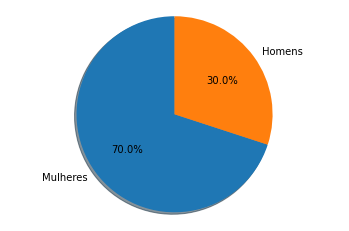

In [11]:
#plotando dados referentes a porcentagem de homens e mulheres docentes na região sudeste, para uma amostra 'x'

labels = 'Mulheres', 'Homens'
sizes = dados_1['Sexo'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

36    438
40    437
42    436
34    388
39    367
38    361
44    361
45    356
46    350
41    347
32    346
37    340
35    301
51    298
52    282
47    277
33    277
30    275
43    268
49    265
50    237
48    235
27    209
55    201
31    188
26    173
54    169
28    166
29    143
59    140
53    135
58    131
57    129
56    125
61    116
25    108
24     82
62     80
22     77
63     70
20     64
23     62
60     46
66     31
64     21
65     20
21     17
18     16
69     11
72      7
71      7
70      5
67      4
19      4
68      1
Name: Idade, dtype: int64

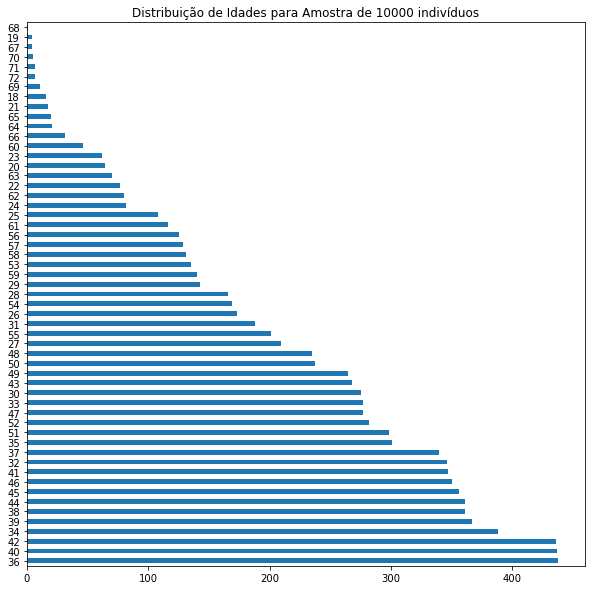

In [12]:
#Amostragem dos dados referente a idade dos professores

idades = dados_1['Idade'][:10000].value_counts().sort_values(ascending=False)

plt.figure(figsize = (10, 10))
idades.plot.barh()
plt.title("Distribuição de Idades para Amostra de 10000 indivíduos")

idades


Text(0.5, 1.0, 'Histograma de Idads para Amostra de 10000 indivíduos')

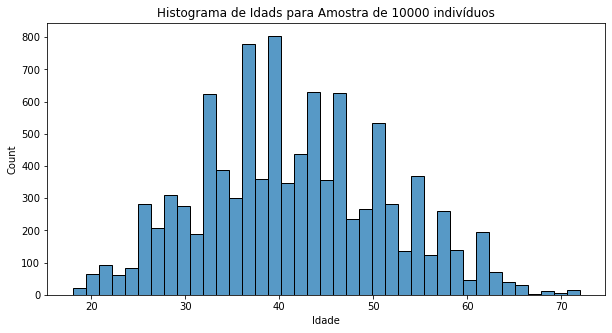

In [13]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dados_1['Idade'][:10000])
plt.title("Histograma de Idads para Amostra de 10000 indivíduos")

In [14]:
#Porcentagem de pessoas com e sem deficiência, para verificação de contagem

contagem_deficiencia = dados_1['Nec. Especial'].value_counts(normalize=True).sort_values(ascending=False)
print(round(contagem_deficiencia * 100, 2).to_frame())

   Nec. Especial
0          99.85
1           0.15


In [15]:
dados_corr = dados_1.drop(['Mês Nasc.', 'Ano Nasc.'], axis=1)
dados_corr.corr()

,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
Idade,1.000000,-0.008107,-0.034210,0.004078,0.094008,0.157679,0.012130,0.015559,-0.060655,0.065409,-0.032303,0.049872,-0.011776,0.066874,0.047374,0.013474,0.022072,0.009921,0.058635,0.057351,0.011131,0.012371
Sexo,-0.008107,1.000000,-0.015622,-0.012801,0.008168,0.059997,-0.102761,-0.047826,-0.080490,0.179971,-0.138685,0.117586,0.081941,0.094065,0.178457,-0.145678,-0.073980,-0.013163,0.085409,0.094301,-0.087491,-0.126480
Etnia,-0.034210,-0.015622,1.000000,0.001759,0.034710,0.010223,-0.033668,-0.025483,0.009053,-0.009864,0.005150,0.002541,-0.019162,-0.001600,-0.010849,0.001729,0.007325,0.002703,-0.003875,0.001406,0.011912,0.023272
Nec. Especial,0.004078,-0.012801,0.001759,1.000000,-0.003771,0.003598,-0.003453,0.002468,-0.006507,0.002325,-0.007752,-0.001762,-0.002812,0.000566,0.001606,0.001156,-0.007616,-0.005831,0.001041,-0.000411,-0.005766,-0.004534
Licenciatura,0.094008,0.008168,0.034710,-0.003771,1.000000,0.184132,-0.013737,-0.034884,0.234519,0.057058,0.096786,0.024378,0.057523,0.026507,0.008354,0.022590,0.018454,0.047120,0.040654,0.046004,0.000364,0.034099
Com espec.,0.157679,0.059997,0.010223,0.003598,0.184132,1.000000,-0.041267,-0.027995,-0.750313,0.045199,0.035657,0.039829,-0.001682,0.032460,0.040588,-0.026545,-0.023821,-0.016391,0.030016,0.031854,-0.027518,-0.018861
Com mestrado,0.012130,-0.102761,-0.033668,-0.003453,-0.013737,-0.041267,1.000000,0.261810,-0.230056,-0.034779,-0.041759,-0.038217,-0.014984,-0.035041,-0.058427,0.051490,0.057250,0.059855,-0.033461,-0.043525,0.035480,0.056188
Com doutorado,0.015559,-0.047826,-0.025483,0.002468,-0.034884,-0.027995,0.261810,1.000000,-0.103600,-0.016290,-0.019349,-0.024922,-0.011096,-0.026615,-0.026986,0.016041,0.046748,0.043849,-0.016530,-0.022735,0.017732,0.009552
Sem pós,-0.060655,-0.080490,0.009053,-0.006507,0.234519,-0.750313,-0.230056,-0.103600,1.000000,-0.032915,0.023426,-0.014829,0.025401,-0.023778,-0.047685,0.039740,0.031508,0.023530,-0.024846,-0.021142,0.040621,0.026051
Língua Portuguesa,0.065409,0.179971,-0.009864,0.002325,0.057058,0.045199,-0.034779,-0.016290,-0.032915,1.000000,-0.036766,0.231493,-0.058321,0.579430,0.719750,-0.072907,-0.072647,-0.071673,0.573637,0.580660,-0.067297,-0.033645


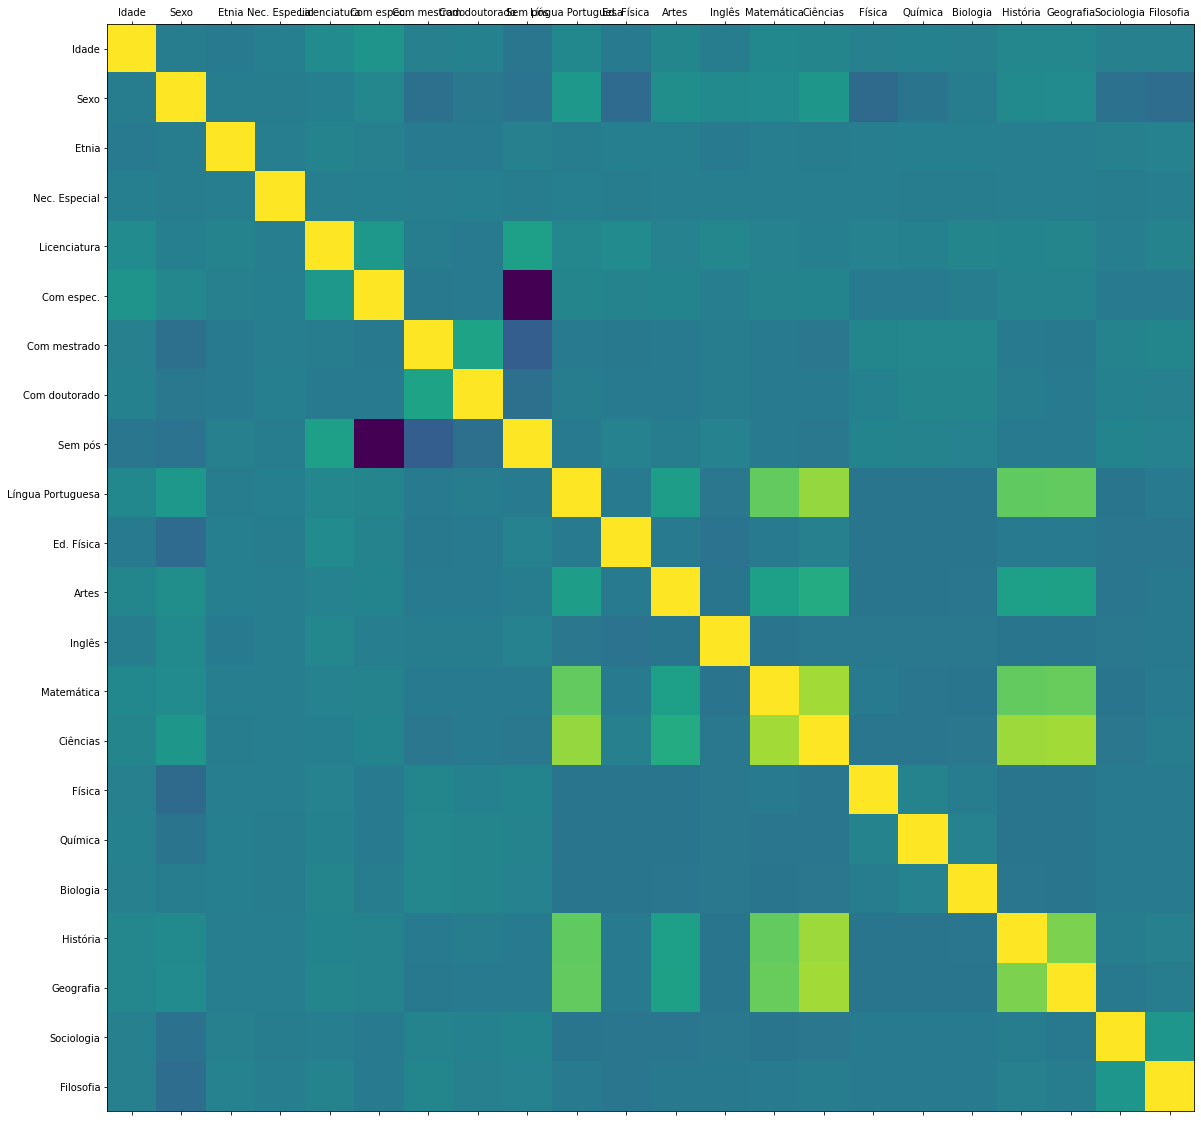

In [16]:
def plot_corr(df, size=20):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

plot_corr(dados_corr)

In [17]:
dados_1.columns[12:]

Index(['Língua Portuguesa', 'Ed. Física', 'Artes', 'Inglês', 'Matemática',
       'Ciências', 'Física', 'Química', 'Biologia', 'História', 'Geografia',
       'Sociologia', 'Filosofia'],
      dtype='object')

In [18]:
#Para este caso, queremos descobrir o número de professores que temos por matérias, portanto será usado um dataframe somente das matérias

# result = print(lambda x: x, dados_1.sum())

materias = pd.DataFrame(dados_1[['Língua Portuguesa', 'Ed. Física', 'Artes', 'Inglês', 'Matemática',
       'Ciências', 'Física', 'Química', 'Biologia', 'História', 'Geografia',
       'Sociologia', 'Filosofia']])

materias

,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Os valores NaN, neste caso, podem ser substituídos por 0, para efeito de contagem e adequação da tabela

materias.fillna(0, inplace=True)
materias.isna().sum()

Língua Portuguesa    0
Ed. Física           0
Artes                0
Inglês               0
Matemática           0
Ciências             0
Física               0
Química              0
Biologia             0
História             0
Geografia            0
Sociologia           0
Filosofia            0
dtype: int64

[<function <lambda> at 0x000002B1D67601F0>, Língua Portuguesa    43354.0
Ed. Física           38638.0
Artes                38934.0
Inglês               23847.0
Matemática           41789.0
Ciências             28419.0
Física               11984.0
Química              11923.0
Biologia             11659.0
História             38591.0
Geografia            39227.0
Sociologia           10437.0
Filosofia            11606.0
dtype: float64]


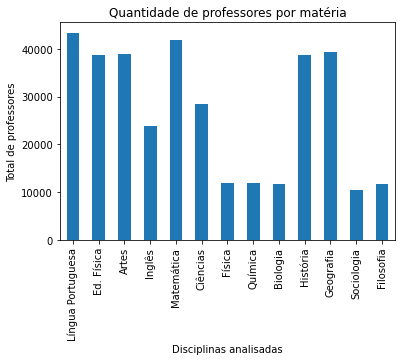

In [20]:
#Aqui verificamos o número de professores por disciplina, analisando se há discrepância no gráfico analisdo

soma_materias = lambda x: x, materias.sum()

materias.sum().plot.bar(title="Quantidade de professores por matéria")
plt.xlabel("Disciplinas analisadas")
plt.ylabel("Total de professores")

soma_materias = list(soma_materias)
df_sum_mat = pd.DataFrame(soma_materias, columns = ['Soma'])

print(soma_materias)

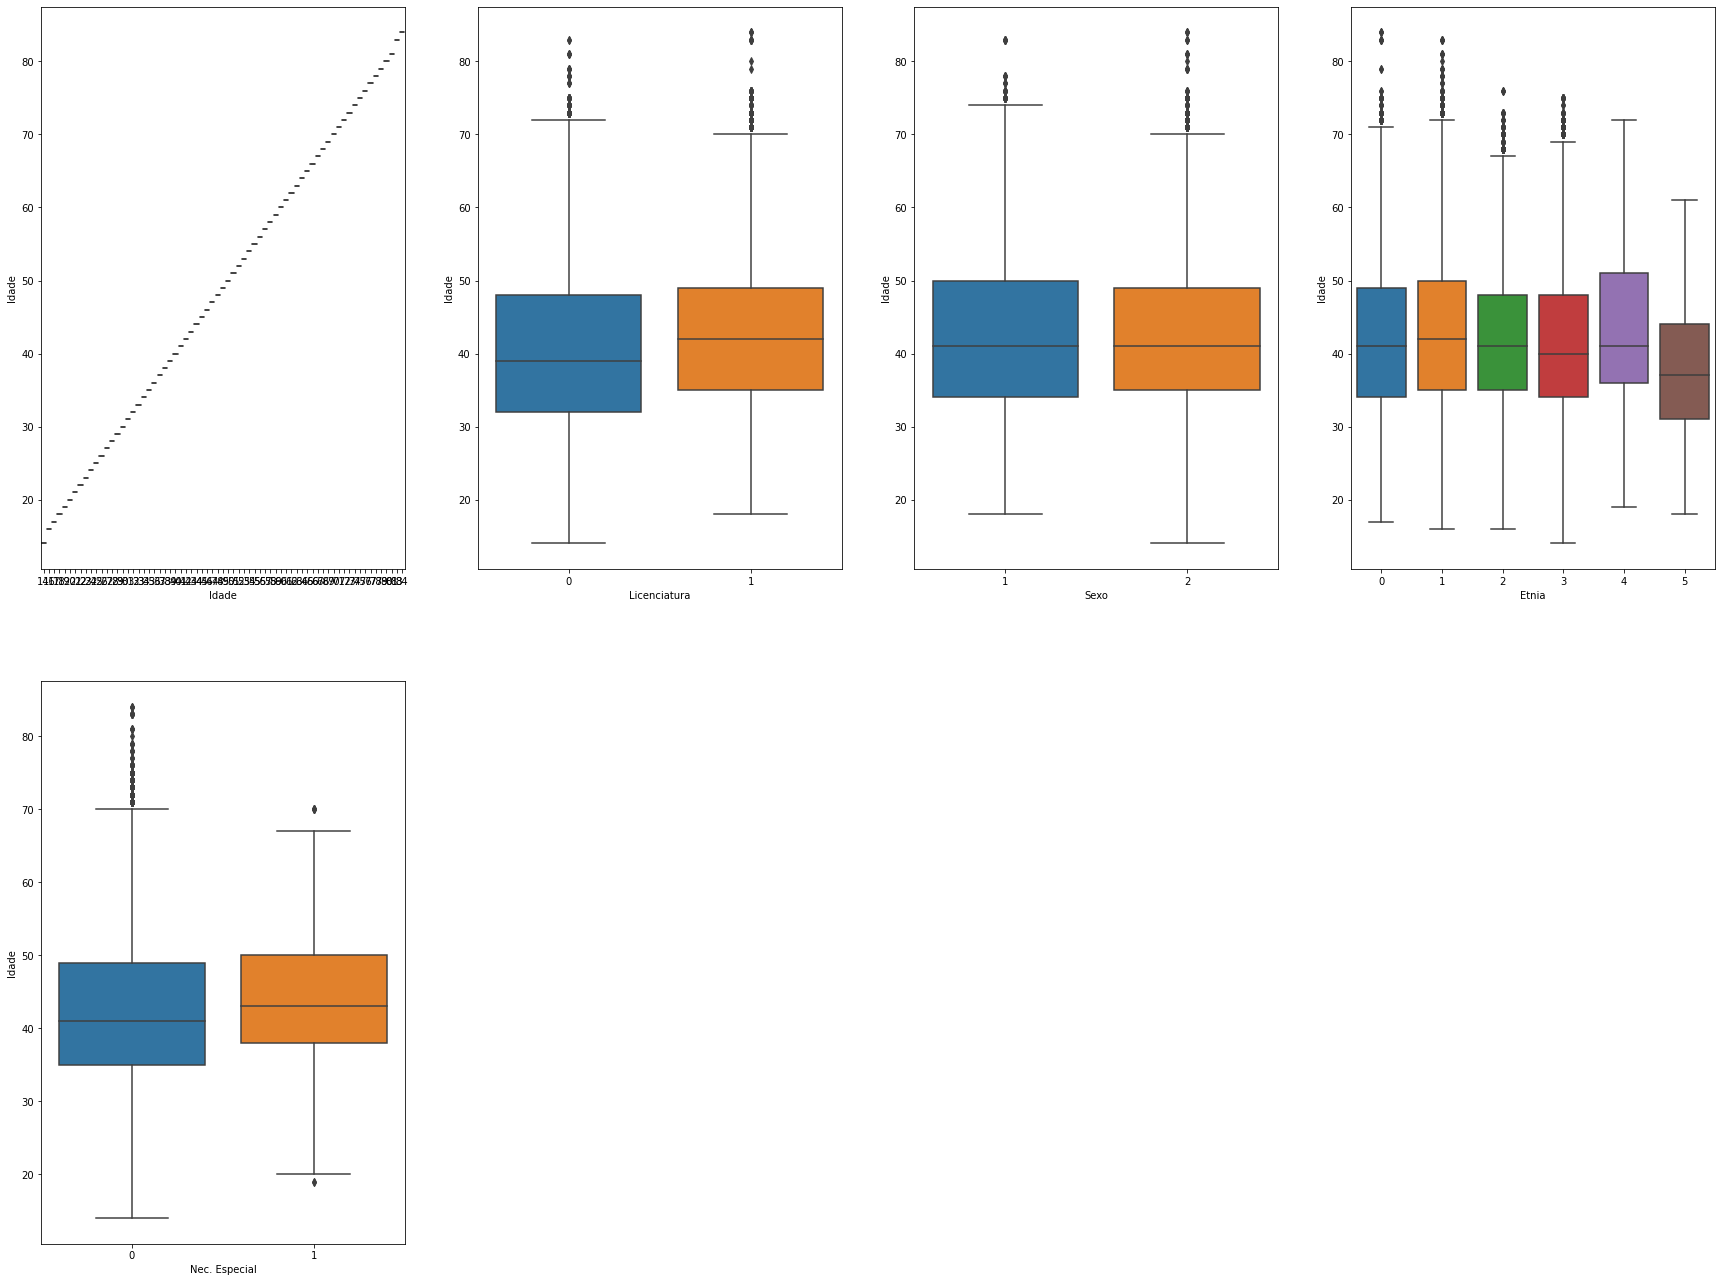

In [21]:
sub = dados_1[['Idade', 'Licenciatura', 'Sexo', 'Etnia', 'Nec. Especial']]

plt.figure(figsize = (30,60))
x = 1
for d in sub:
    plt.subplot(5, 4, x)
    sns.boxplot(data = sub, x = d, y = 'Idade')
    x += 1

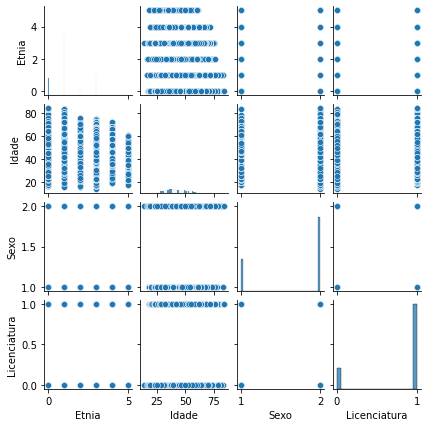

In [22]:
sns.pairplot(dados_1[['Etnia', 'Idade', 'Sexo', 'Licenciatura']], diag_kind="hist", height=1.5)

In [23]:
dados_1.drop(['Mês Nasc.', 'Ano Nasc.'], axis=1).describe()

,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
count,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000,325260.000000
mean,42.059540,1.699788,1.284941,0.001522,0.802115,0.344100,0.047002,0.009903,0.517629,0.133290,0.118791,0.119701,0.073317,0.128479,0.087373,0.036844,0.036657,0.035845,0.118647,0.120602,0.032088,0.035682
std,10.048288,0.458351,0.984240,0.038981,0.398405,0.475075,0.211644,0.099019,0.499690,0.339889,0.323543,0.324612,0.260656,0.334623,0.282382,0.188380,0.187918,0.185904,0.323373,0.325665,0.176235,0.185497
min,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Analisando modelos para previsão de novos professores

In [24]:
# Previsão para o futuro
df1 = dados_1[:10000].copy().drop(['ID_DOCENTE', 'Mês Nasc.', 'Ano Nasc.'], axis=1)
df1 

,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia
0,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,1,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15321,38,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15322,38,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15323,38,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15324,38,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
num_true = len(df1.loc[df1['Matemática'] == True])
num_false = len(df1.loc[df1['Matemática'] == False])
print("Número de Casos em Matemática: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos em Matemática: 1208 (12.08%)
Número de Casos Falsos     : 8792 (87.92%)


### Analisando com SVM

In [26]:
## teste para descobrir como se comporta o modelo de classificação aos dados do projeto

from sklearn import svm
from sklearn.model_selection import  train_test_split

In [27]:
data = df1.drop(['Matemática'], axis=1)
target = df1['Matemática']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)

In [29]:
classifier = svm.SVC(C=1.0)

In [30]:
classifier.fit(x_train, y_train)

SVC()

In [31]:
# classifier.predict(x_test)

print(classifier.predict(x_test))

[1. 0. 0. ... 0. 0. 0.]


In [32]:
classifier.score(x_test, y_test)

0.9432

In [33]:
classificacao = classifier.predict(data)

df1['classificacao'] = classificacao
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1[['Matemática', 'classificacao']]

,Matemática,classificacao
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
15321,0.0,0.0
15322,0.0,0.0
15323,0.0,0.0
15324,0.0,0.0


In [34]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts()

 0.0    9510
 1.0     481
-1.0       9
Name: diff, dtype: int64

### Decision Tree Regressor

In [35]:
#teste com o decision tree regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

tester = DecisionTreeRegressor()
tester.fit(x_train, y_train)

predicao = tester.predict(x_test)

np.sqrt(mean_squared_error(y_test, predicao))

0.1623558116195082

In [36]:
tester.score(x_test, y_test)

0.7619310823217655

In [37]:
# plot_tree(tester)

classificacao = tester.predict(data)

df1['classificacao'] = classificacao
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1[['Matemática', 'classificacao']]

,Matemática,classificacao
0,1.0,0.222222
1,1.0,0.222222
2,1.0,0.222222
3,1.0,0.222222
4,1.0,0.222222
...,...,...
15321,0.0,0.000000
15322,0.0,0.000000
15323,0.0,0.000000
15324,0.0,0.000000


In [38]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts()

 0.000000    9213
-0.200000      75
-0.500000      49
 0.500000      45
-0.333333      39
             ... 
 0.928571       1
 0.923077       1
 0.857143       1
 0.941176       1
 0.909091       1
Name: diff, Length: 63, dtype: int64

### Random Forest

In [39]:
#Usando randomforest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=50, criterion='gini')
clf.fit(x_train, y_train)

pred2 = clf.predict(x_test)

np.sqrt(mean_squared_error(y_test, pred2))

0.18

In [40]:
ms = clf.score(x_test, y_test) 

print("Exatidão (Accuracy): {0:.4f}".format(ms))
print()

Exatidão (Accuracy): 0.9676



In [41]:
probabilidade = clf.predict_proba(data)[:,1]
classificacao = clf.predict(data)

df1['probabilidade'] = probabilidade
df1['classificacao'] = classificacao

df1[['Matemática', 'probabilidade', 'classificacao']]

,Matemática,probabilidade,classificacao
0,1.0,0.232163,0.0
1,1.0,0.232163,0.0
2,1.0,0.232163,0.0
3,1.0,0.232163,0.0
4,1.0,0.232163,0.0
...,...,...,...
15321,0.0,0.000000,0.0
15322,0.0,0.000000,0.0
15323,0.0,0.000000,0.0
15324,0.0,0.000000,0.0


In [42]:
df1['diff'] = df1['Matemática'] - df1['classificacao']

df1['diff'].value_counts()

 0.0    9777
 1.0     148
-1.0      75
Name: diff, dtype: int64

### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

modelo_v1 = GaussianNB()

modelo_v1.fit(x_train, y_train.ravel())

GaussianNB()

In [44]:
nb_predict_train = modelo_v1.predict(x_test)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_train)))

Exatidão (Accuracy): 0.3544


### Testando o modelo com os dados novos do dataset

In [70]:
#Verificando quantos professores, a partir do conjunto de dados, serão da matéria de matemática
df2 = dados_1[100000:100100].drop(['ID_DOCENTE', 'Mês Nasc.', 'Ano Nasc.'], axis=1)

data = df2.drop(['Matemática'], axis=1)
target = df2['Matemática']

data.fillna(0, inplace=True)
target.fillna(0, inplace=True)

x = data
y = target

In [71]:
pred3 = clf.predict(data)

np.sqrt(mean_squared_error(target, pred3))

0.282842712474619

In [72]:
print(pred3.sum(), '|', clf.score(data, target), '|', np.unique(pred3, return_counts=True))

12.0 | 0.92 | (array([0., 1.]), array([88, 12], dtype=int64))


In [73]:
print((df1['Matemática'].sum()/df1['Matemática'].count())*100, '%')

12.08 %


In [74]:
# probabilidade = classifier.predict_proba(data)[:,1]

# df2['probabilidade'] = probabilidade
df2['Predict'] = pred3

# pd.set_option("max_rows", None)
df2[['Matemática', 'Predict']]

,Matemática,Predict
154207,1.0,1.0
154208,1.0,1.0
154209,0.0,0.0
154212,0.0,0.0
154213,0.0,0.0
154214,0.0,0.0
154215,0.0,0.0
154216,0.0,0.0
154217,0.0,0.0
154218,0.0,0.0


In [75]:
df2['Matemática'].sum()

10.0

In [76]:
df2['Predict'].sum()

12.0

In [77]:
df2['Diff'] = df2['Matemática'] - df2['Predict']

df2['Diff'].value_counts()

 0.0    92
-1.0     5
 1.0     3
Name: Diff, dtype: int64

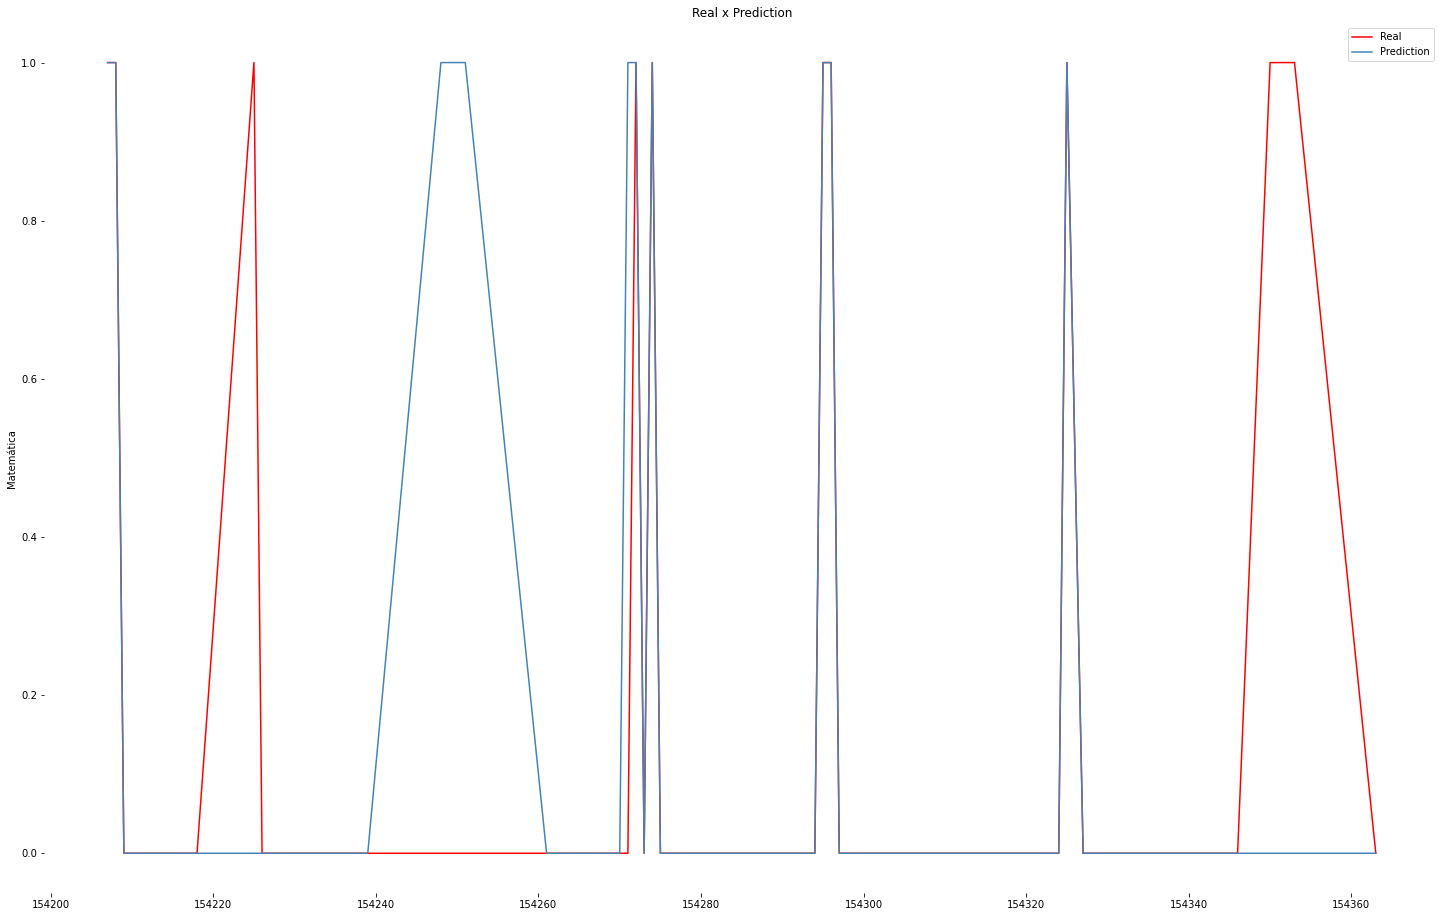

In [78]:
plt.figure(figsize=(25, 16))

sns.lineplot(data = df2, x = df2.index, y = 'Matemática', label = 'Real', color = 'red')
sns.lineplot(data = df2, x = df2.index, y = 'Predict', label = 'Prediction', color = 'steelblue')
plt.title('Real x Prediction')
sns.despine(bottom = True, left = True)

In [79]:
# pd.set_option("max_rows", None)
df2

,Idade,Sexo,Etnia,Nec. Especial,Licenciatura,Com espec.,Com mestrado,Com doutorado,Sem pós,Língua Portuguesa,Ed. Física,Artes,Inglês,Matemática,Ciências,Física,Química,Biologia,História,Geografia,Sociologia,Filosofia,Predict,Diff
154207,32,2,1,0,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
154208,32,2,1,0,1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
154209,48,2,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154212,42,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
154213,42,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
154214,42,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
154215,42,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
154216,42,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
154217,42,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
154218,42,2,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
